In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from generators.base import OutlierGenerator
from generators.extreme_outlier_generator import ExtremeOutlierGenerator
from generators.shift_outlier_generator import ShiftOutlierGenerator
from generators.trend_outlier_generator import TrendOutlierGenerator
from generators.variance_outlier_generator import VarianceOutlierGenerator
from generators.data_generator import DataGenerator
from detectors.lof_detector import LofDetector

In [2]:
STREAM_LENGTH = 200
extreme_gens = []
for i in range(0,40):
    extreme_gens.append(ExtremeOutlierGenerator(timestamps=[i], value=1))

extreme_gens.append(TrendOutlierGenerator(timestamps=[(40,60)], trend_value = 0.3))

for i in range(60,200):
    extreme_gens.append(ExtremeOutlierGenerator(timestamps=[i], value=7))

dg = DataGenerator(STREAM_LENGTH, extreme_gens)
df = dg.run()

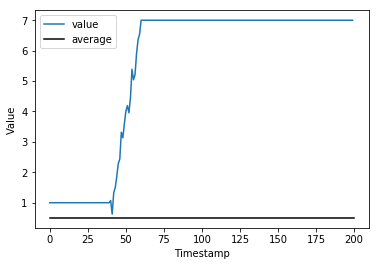

In [3]:
plt.plot(df['value'])
plt.plot([0, 200], [0.5, 0.5], 'k-', label='average')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

('I is', 3)


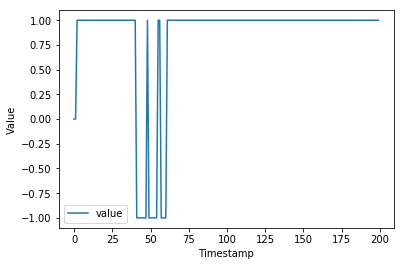

('I is', 4)


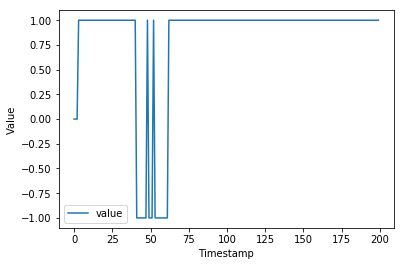

('I is', 5)


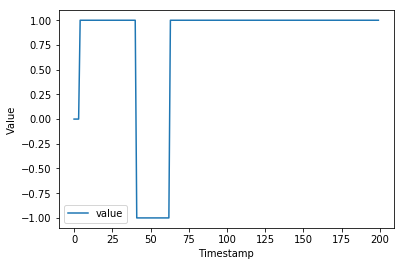

('I is', 6)


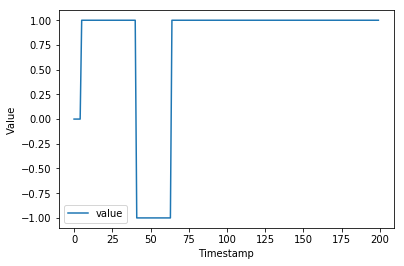

('I is', 7)


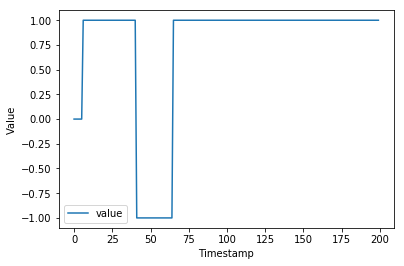

('I is', 8)


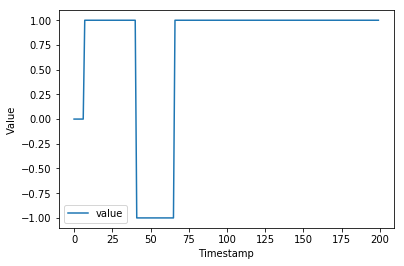

('I is', 9)


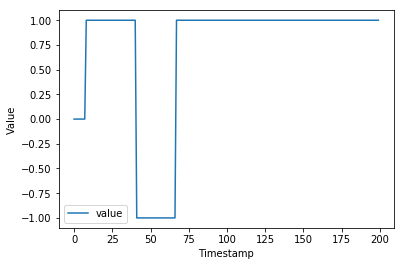

('I is', 10)


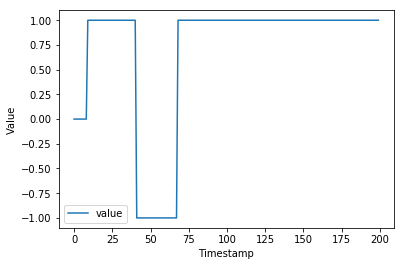

('I is', 11)


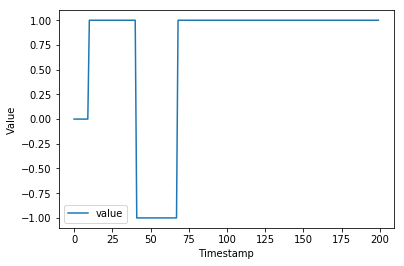

('I is', 12)


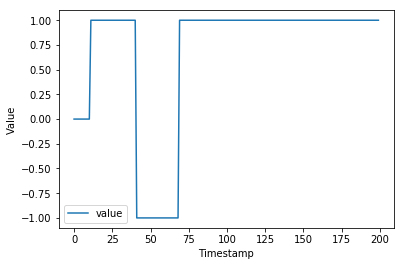

('I is', 13)


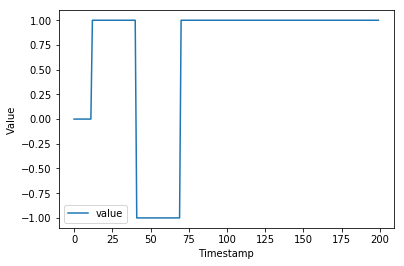

('I is', 14)


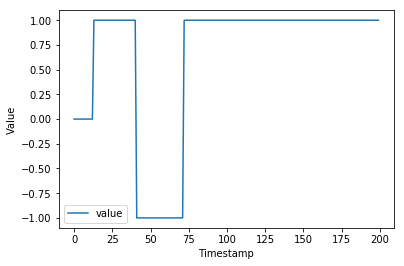

('I is', 15)


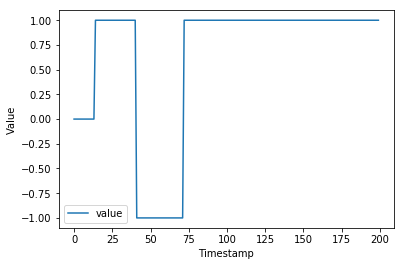

('I is', 16)


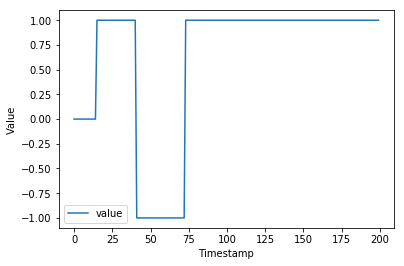

('I is', 17)


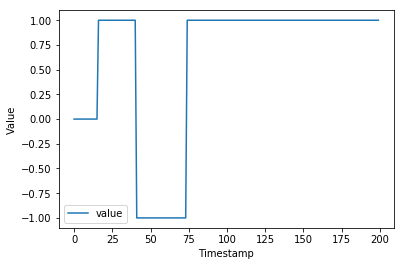

('I is', 18)


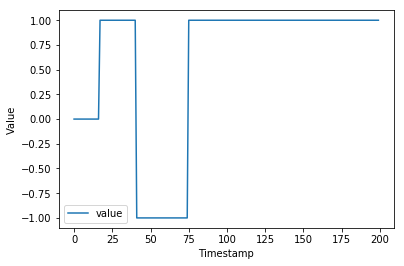

('I is', 19)


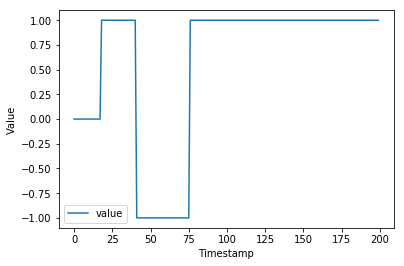

('I is', 20)


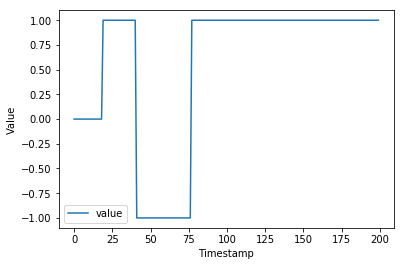

('I is', 21)


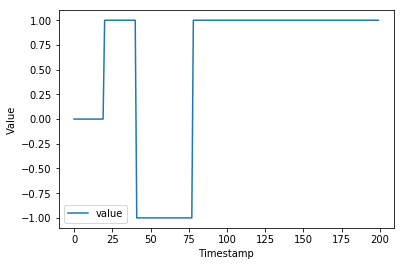

('I is', 22)


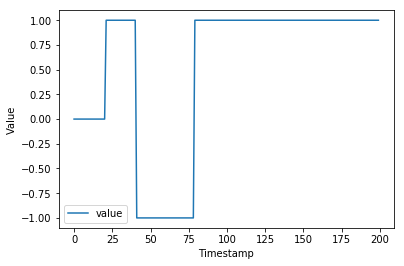

('I is', 23)


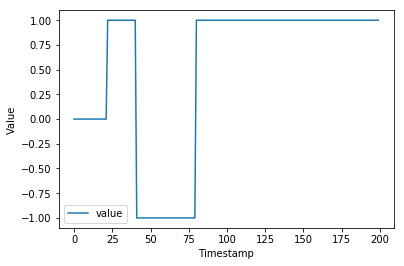

('I is', 24)


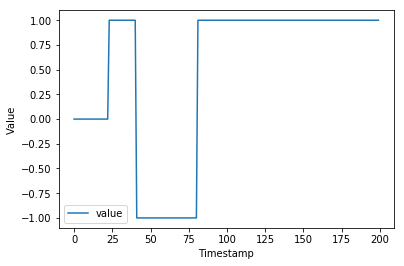

('I is', 25)


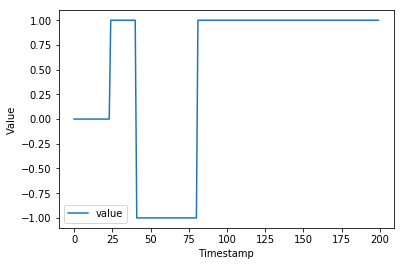

('I is', 26)


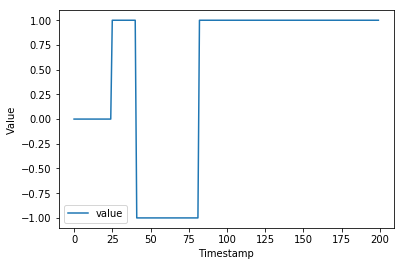

('I is', 27)


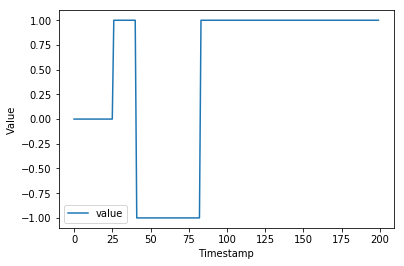

('I is', 28)


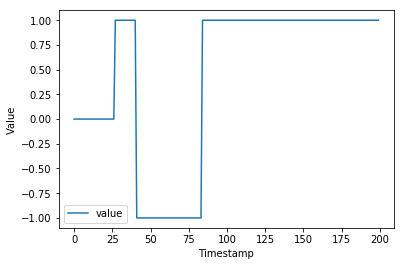

('I is', 29)


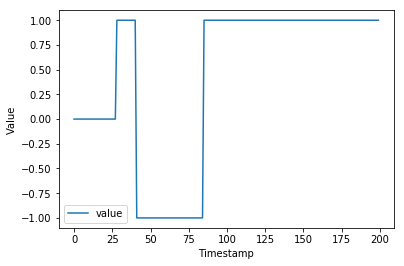

('I is', 30)


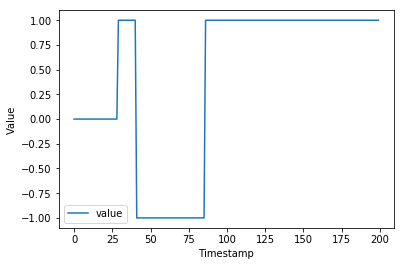

('I is', 31)


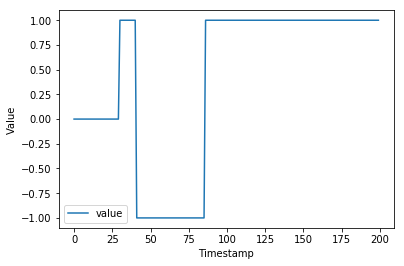

('I is', 32)


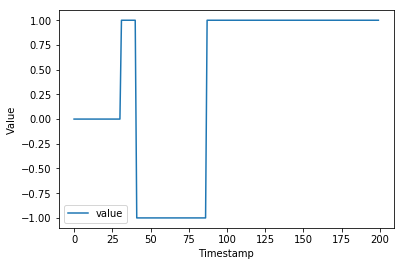

('I is', 33)


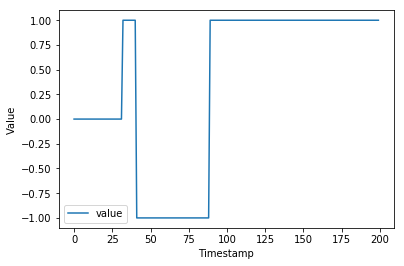

('I is', 34)


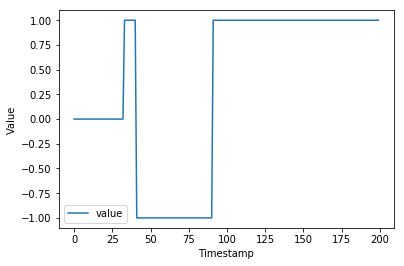

('I is', 35)


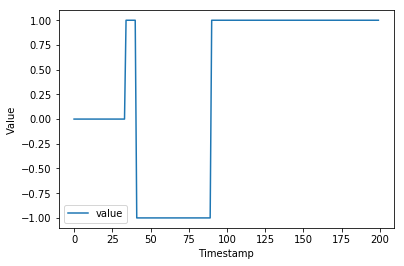

('I is', 36)


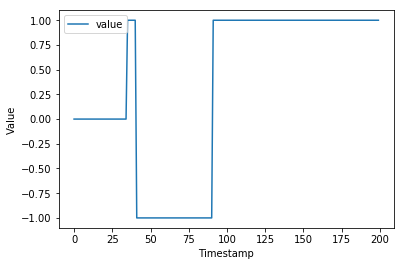

('I is', 37)


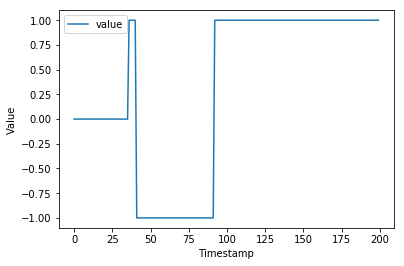

('I is', 38)


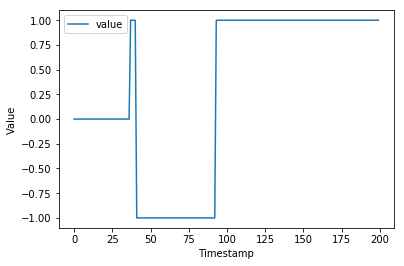

('I is', 39)


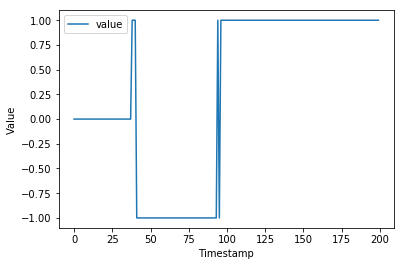

('I is', 40)


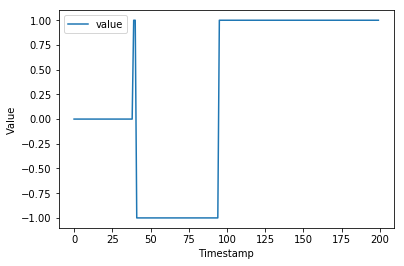

('I is', 41)


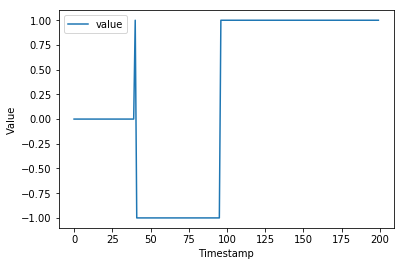

('I is', 42)


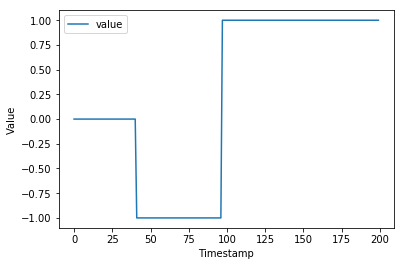

('I is', 43)


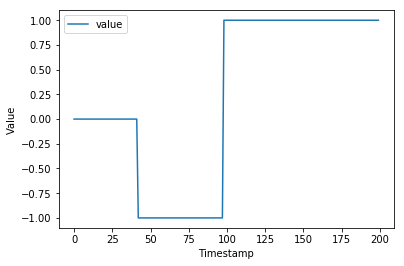

('I is', 44)


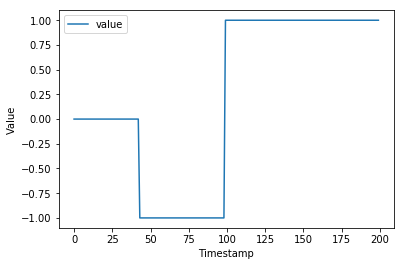

('I is', 45)


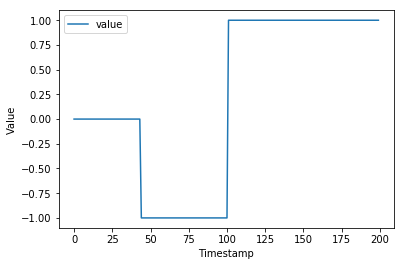

('I is', 46)


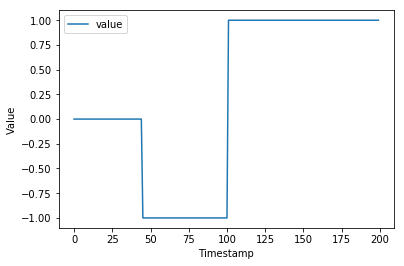

('I is', 47)


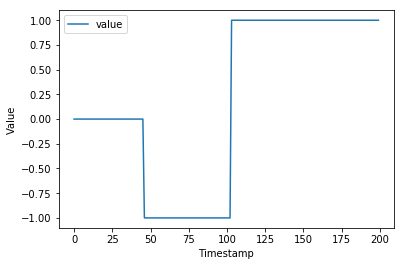

('I is', 48)


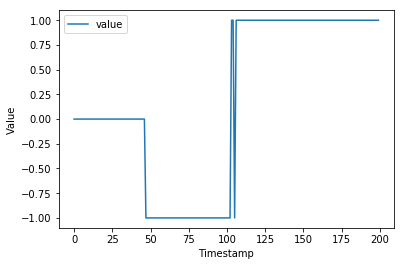

('I is', 49)


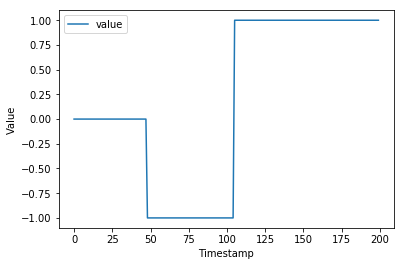

In [4]:
scores_df = pd.DataFrame(columns=df.columns)
scores_df['timestamp'] = df['timestamp']
scores_df.set_index('timestamp', inplace=True)
    
for i in range(3,50):
    #print('Iteration for i=', i)
    detector = LofDetector(neighbors=i, contamination=0.1)
    #for index, row in tqdm(df.iterrows(), total=len(df)):
    for index, row in df.iterrows():
        series = detector.handle_row(row)
        scores_df.at[index, 'value'] = series.iat[0]
    #print(scores_df['value'].value_counts())
    if (scores_df['value'].value_counts()[-1]+scores_df['value'].value_counts()[0]) != 200:
        print('I is', i)
        plt.plot(range(0,200), scores_df['value'])
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

('I is', 2)


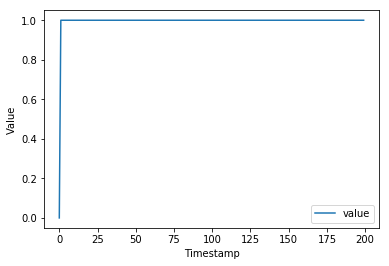

In [7]:
i = 2
#print('Iteration for i=', i)
detector = LofDetector(neighbors=i, contamination=0.1)
#for index, row in tqdm(df.iterrows(), total=len(df)):
for index, row in df.iterrows():
    series = detector.handle_row(row)
    scores_df.at[index, 'value'] = series.iat[0]
#print(scores_df['value'].value_counts())
print('I is', i)
plt.plot(range(0,200), scores_df['value'])
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()